# DFT AM Modulation

In [1]:
from os.path import exists
file_exists = exists('basic_material.py')

if (not file_exists):
    !wget -O basic_material.py https://raw.githubusercontent.com/JonHowMIT/Signals_and_Systems/main/basic_material.py
%run basic_material

import cmath
import pandas as pd
j = complex(0,1)

Running Python: 3.8.17
Running Sympy: 1.12rc1


In [2]:
Fs = 2000 #                    % Sampling frequency
T = 1/Fs #                     % Sampling period
L = 4096 #                     % Length of signal
n = int(2**np.ceil(np.log2(L)))
f = np.linspace(0,1/2-1/n,n)*Fs #   % freq vector 

In [11]:
t = np.arange(L)*T #                % Time vector

f_sig1 = 20 #hz
f_sig2 = 300 #hz

x1 = np.cos(2*np.pi*f_sig1*t) + np.sin(2*np.pi*1.5*f_sig1*t - np.pi/4)
x2 = np.cos(2*np.pi*f_sig2*t) # modulating signal
x2a = np.cos(2*np.pi*f_sig2*t + np.pi/np.sqrt(2)) # modulating signal

x3 = x1*x2
x4 = x3*x2

In [12]:
X1 = fft(x1)
X2 = fft(x2)
X3 = fft(x3)
X4 = fft(x4)

X1_plot = fftshift(X1)/n
X2_plot = fftshift(X2)/n
X3_plot = fftshift(X3)/n
X4_plot = fftshift(X4)/n

xf = fftfreq(n, 1/Fs)
xf_plot = fftshift(xf)


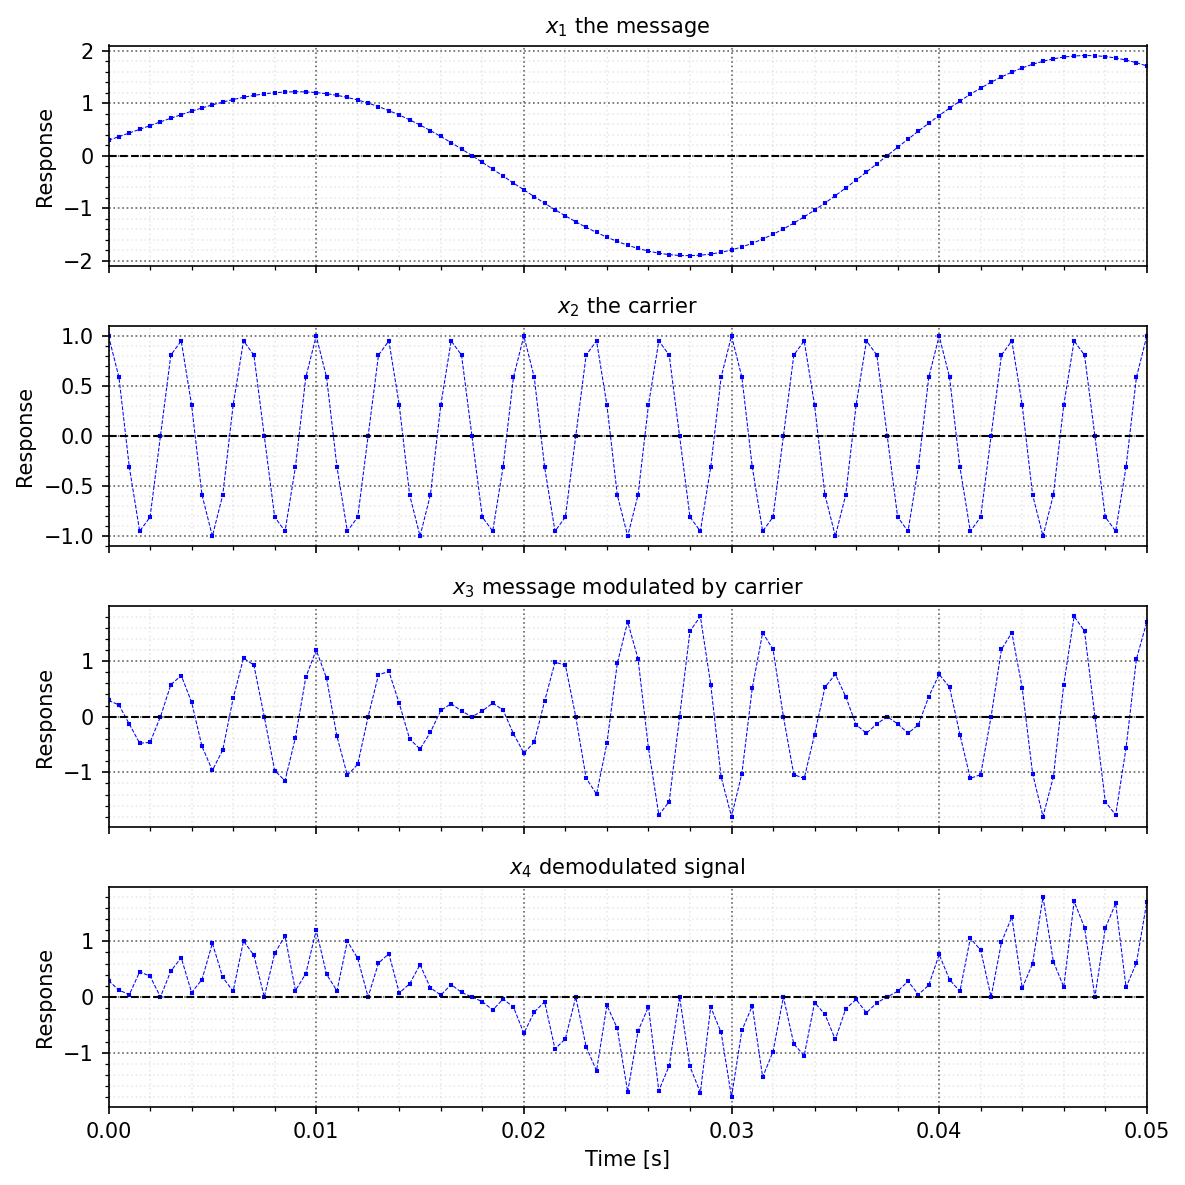

In [28]:
fig, ax = plt.subplots(4,1, figsize=(8,8), dpi=150,sharex=True)
fig.tight_layout(pad=2)
ax[0].plot(t, x1,'bs--',label='with 4096 pts',lw=0.5,ms=1)
ax[1].plot(t, x2,'bs--',label='with 4096 pts',lw=0.5,ms=1)
ax[2].plot(t, x3,'bs--',label='with 4096 pts',lw=0.5,ms=1)
ax[3].plot(t, x4,'bs--',label='with 4096 pts',lw=0.5,ms=1)
titles=['$x_1$ the message','$x_2$ the carrier','$x_3$ message modulated by carrier','$x_4$ demodulated signal']
ax[3].set_xlabel('Time [s]')
for ii in np.arange(4):
    ax[ii].set_ylabel('Response')
    ax[ii].set_title(titles[ii])
    nicegrid(ax[ii])
    ax[ii].set_xlim([0, .05])
fig.savefig('./figs/T8_ex11_1.png', dpi=300)

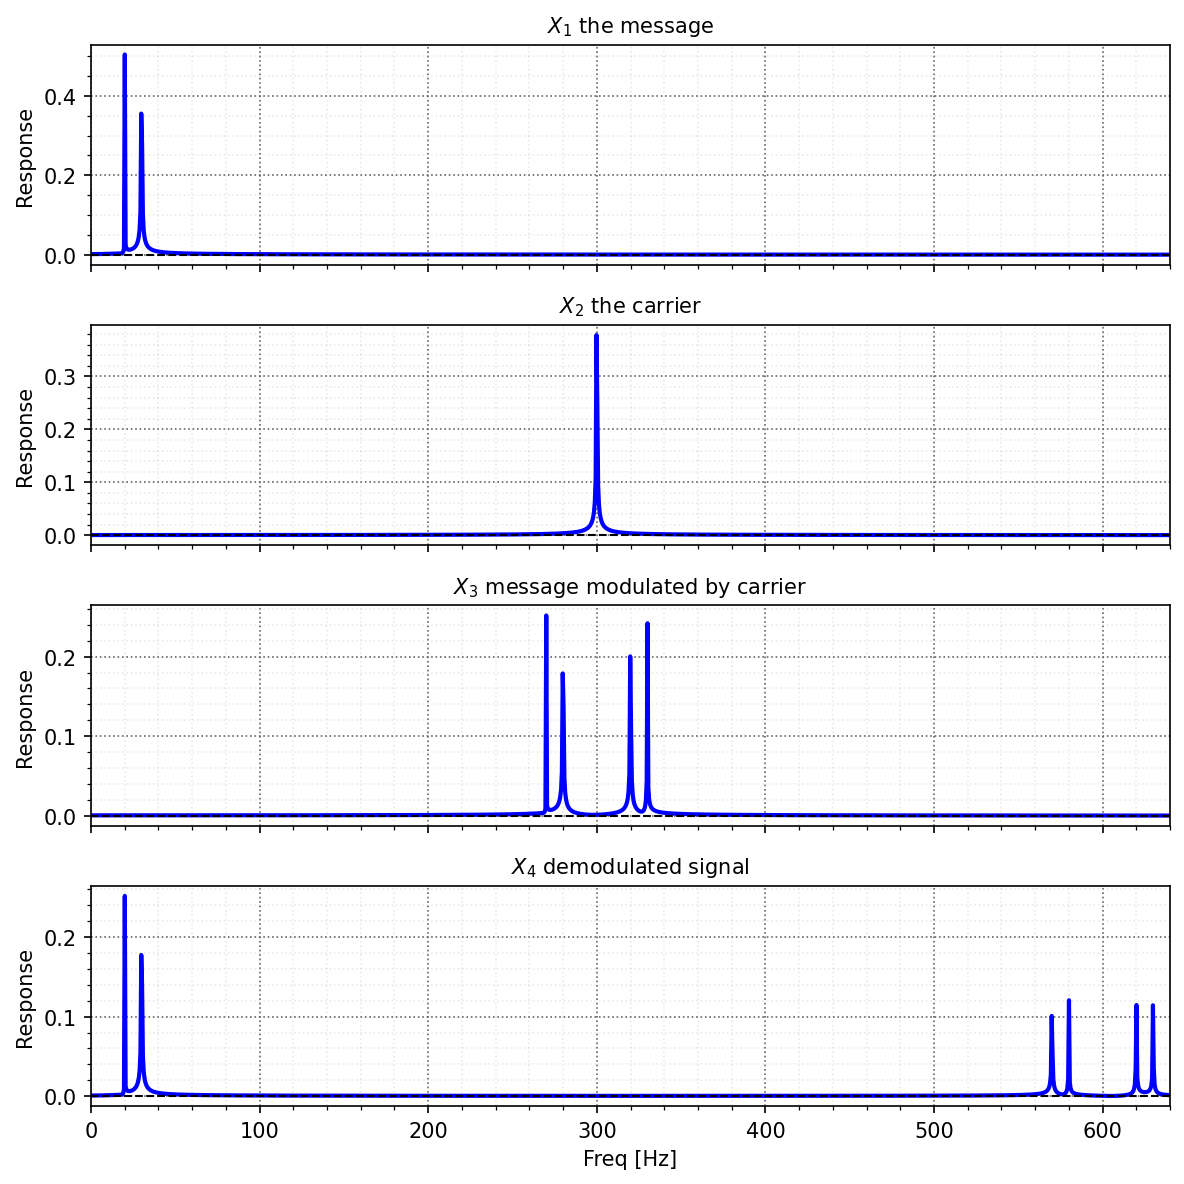

In [31]:
fig, ax = plt.subplots(4,1, figsize=(8,8), dpi=150,sharex=True)
fig.tight_layout(pad=2)
ax[0].plot(xf_plot, np.abs(X1_plot),'b-',label='$|X_1|$')
ax[1].plot(xf_plot, np.abs(X2_plot),'b-',label='$|X_1|$')
ax[2].plot(xf_plot, np.abs(X3_plot),'b-',label='$|X_1|$')
ax[3].plot(xf_plot, np.abs(X4_plot),'b-',label='$|X_1|$')
titles=['$X_1$ the message','$X_2$ the carrier','$X_3$ message modulated by carrier','$X_4$ demodulated signal']
ax[3].set_xlabel('Freq [Hz]')
for ii in np.arange(4):
    ax[ii].set_ylabel('Response')
    ax[ii].set_title(titles[ii])
    nicegrid(ax[ii])
ax[3].set_xlim([0, 2*(f_sig2+f_sig1)])
    
fig.savefig('./figs/T8_ex11_2.png', dpi=300)
plt.show()